# Project 7
### Author *Matt Riley*
### Date *10/6/2023*
### Repo *https://github.com/rilesKC/datafun-07-ml-predictive*

## Part 1 - Linear Regression

In [642]:
c = lambda f: 5 / 9 * (f - 32)

In [643]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [644]:
import pandas as pd

In [645]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

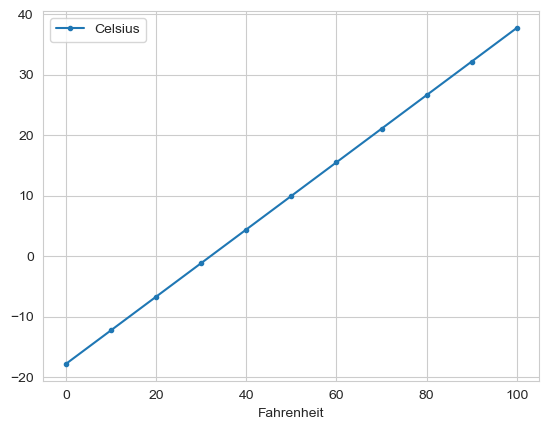

In [646]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [647]:
y_label = axes.set_ylabel('Celsius')

## Section 1 - Load

In [648]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2 - View

In [649]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [650]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Clean

In [651]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [652]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [653]:
nyc.Date.dtype

dtype('int64')

In [654]:
nyc.Date = nyc.Date.floordiv(100)

In [655]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Describe

In [656]:
pd.set_option('display.precision', 2)

In [657]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Calculate

In [658]:
from scipy import stats

In [659]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [660]:
linear_regression.slope

0.014771361132966163

In [661]:
linear_regression.intercept

8.694993233674289

## Section 6 - Predict

In [662]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [663]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [664]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Section 7 - Plot

In [665]:
import seaborn as sns

In [666]:
sns.set_style('whitegrid')

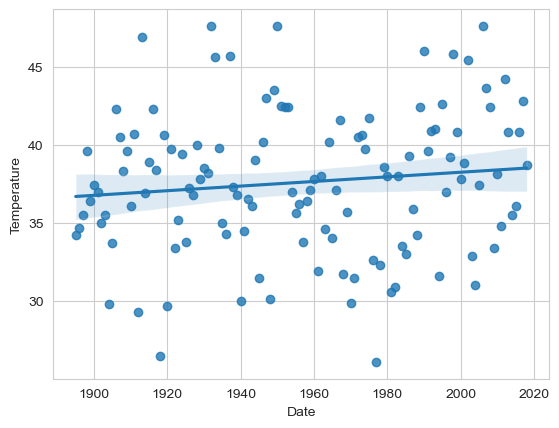

In [667]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [668]:
axes.set_ylim(10,70)

(10.0, 70.0)

# Part 2 - Machine Learning

## Section 1 - Splitting the Data for Training and Testing

In [669]:
from sklearn.model_selection import train_test_split

In [670]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [671]:
X_train.shape

(93, 1)

In [672]:
X_test.shape

(31, 1)

## Section 2 - Training the Model

In [673]:
from sklearn.linear_model import LinearRegression

In [674]:
linear_regression = LinearRegression()

In [675]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [676]:
linear_regression.coef_

array([0.01939167])

In [677]:
linear_regression.intercept_

-0.30779820252656265

## Section 3 - Testing the Model

In [678]:
predicted = linear_regression.predict(X_test)

In [679]:
expected = y_test

In [680]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Section 4 - Predicting Future Temperatures and Estimating Past Temperatures

In [681]:
predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

In [682]:
predict(2019)

array([38.84399018])

In [683]:
predict(1890)

array([36.34246432])

## Section 5 - Visualizing the Dataset with the Regression Line

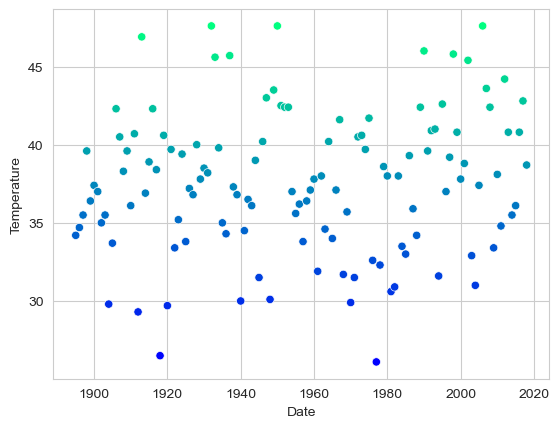

In [684]:
# seaborn was imported previously
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

In [685]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [686]:
import numpy as np

In [687]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [688]:
y = predict(x)

In [689]:
import matplotlib.pyplot as plt

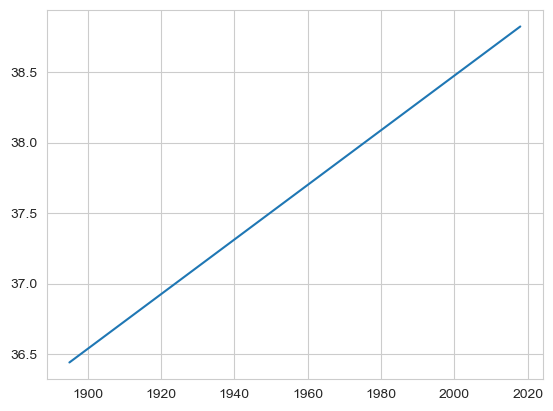

In [690]:
line = plt.plot(x, y)

## Section 6 - Remarks

The linear regression approach feels like a more manual, step by step method of analysis, whereas machine learning feels more automated. The output is very similar for both methods, though. I think with machine learning we could do more things in less time because some of those manual steps can be taken care of automatically.